In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
dat = pd.read_excel('Pilot_GeneExpressionData.xlsx')

In [4]:
dat

,Expression - gene 000,Expression - gene 001,Expression - gene 002,Expression - gene 003,Expression - gene 004,Expression - gene 005,Expression - gene 006,Expression - gene 007,Expression - gene 008,Expression - gene 009,...,Expression - gene 090,Expression - gene 091,Expression - gene 092,Expression - gene 093,Expression - gene 094,Expression - gene 095,Expression - gene 096,Expression - gene 097,Expression - gene 098,Expression - gene 099
0,-1.237358,38.642584,10.884096,-3.339147,-1.555339,14.407978,55.770644,13.109897,11.652522,365.928797,...,68.662581,1.343553,20.079415,48.342081,5.199666,8.582158,325.058081,413.412361,655.467974,224.045697
1,-2.093798,39.399697,5.863917,-2.270315,-0.486506,9.469040,60.626785,9.492048,17.507333,365.129055,...,79.764261,12.445233,11.953880,52.238938,-0.116666,4.537059,321.012982,413.379518,655.339022,224.529880
2,14.470170,36.381095,-9.510318,15.156488,16.940296,-7.909798,74.697892,-4.465825,12.619979,335.499965,...,73.074749,5.755721,16.613457,55.059154,4.151859,5.631896,322.107819,411.768780,655.437052,224.088647
3,-3.074387,39.030519,9.228330,-3.344361,-1.560553,12.287957,58.692670,11.807070,15.281483,366.153522,...,68.135925,0.816897,22.837977,49.460210,7.882375,8.555372,325.031295,411.803469,655.470397,223.914104
4,-0.898006,39.088386,4.945750,-1.124616,0.659192,8.204751,61.690854,8.721729,16.890130,362.689877,...,77.619769,10.300741,14.478982,50.745263,1.451071,5.621678,322.097601,413.323667,655.363004,224.430544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,12.615589,36.598107,-7.345092,13.595942,15.379751,-5.879808,73.150958,-2.758040,12.639858,338.132539,...,70.516379,3.197351,18.864693,52.088667,5.255283,7.102821,323.578744,412.274116,655.452935,224.046372
4890,1.613536,38.322495,4.236704,0.420512,2.204321,7.376949,62.643327,7.956535,14.224713,358.798674,...,66.752538,-0.566490,24.111794,42.491838,6.873288,10.740558,327.216481,414.301530,655.470614,224.084468
4891,0.333339,39.274807,0.705602,1.015152,2.798960,4.313178,65.747741,5.387821,19.485853,359.882050,...,77.500270,10.181242,14.018217,50.435560,1.057676,5.567043,322.042966,413.489710,655.351961,224.478674
4892,2.735758,38.561036,-1.058395,4.172354,5.956162,1.442543,67.973740,3.798262,18.125243,354.280755,...,73.427989,6.108961,20.665591,49.344682,5.941653,7.506026,323.981949,412.338047,655.434907,224.110261


Kmeans , optic and dbscan

In [25]:
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import k_means
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sn
import matplotlib as plt

In [30]:

pipeline = Pipeline([
 ('scale', StandardScaler()),
 ('PCA', PCA())
])

pca = pd.DataFrame(pipeline.fit_transform(dat),columns=pipeline['PCA'].get_feature_names_out())
print(pca)
pipeline.fit(dat)

pipeline['PCA'].explained_variance_


          pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0    -5.544767  2.717605 -8.594973 -5.500864  6.647001  0.282942  1.674030   
1    -7.200475 -7.526954  2.624290 -1.114498  0.765139  0.113852  0.658387   
2     7.855053  6.302694  6.282120 -2.166174  1.453349 -0.308374 -0.079918   
3    -7.459648  3.718405 -3.855239  1.108657  5.881422  0.589935 -2.036945   
4    -5.884115 -5.344226  2.013932 -0.541739 -0.232778 -0.186916  0.401733   
...        ...       ...       ...       ...       ...       ...       ...   
4889  5.972507  8.254149  4.975134 -0.869118  1.831111 -0.233525 -1.312430   
4890 -3.091708  7.866303 -3.209349 -0.738923 -3.248829  0.564579  0.965804   
4891 -4.568357 -5.042849  4.923147  2.120696 -1.735770  1.414009  1.127388   
4892 -1.494967 -0.240045  4.071157  4.036894 -0.636108 -2.133743  0.912785   
4893 -6.715863 -7.365794  4.522817  0.220842  0.434046  0.928263  0.708044   

          pca7      pca8      pca9  ...         pca90         p

array([3.69633915e+01, 2.65800689e+01, 1.39162556e+01, 1.00375940e+01,
       6.86691994e+00, 2.77081944e+00, 1.78885257e+00, 3.81090785e-01,
       3.64260134e-01, 1.33666963e-01, 1.11559427e-01, 4.57334298e-02,
       1.85615297e-02, 1.43091344e-02, 9.20508099e-03, 6.83963996e-03,
       3.51901471e-03, 2.25783540e-03, 2.13820477e-03, 1.63410293e-03,
       7.00512984e-04, 4.30940582e-04, 2.92895543e-04, 9.22011347e-05,
       9.04763920e-05, 5.19897303e-05, 4.04097899e-05, 3.22627184e-05,
       1.45627333e-05, 5.17775428e-06, 3.06988877e-06, 2.84481068e-06,
       9.20204646e-07, 5.34656510e-07, 4.47661313e-07, 3.60079722e-07,
       1.82296341e-07, 1.62288566e-07, 9.02555218e-08, 4.80732143e-08,
       1.70875576e-08, 8.16661234e-09, 2.19337278e-09, 1.64092334e-09,
       1.46321049e-09, 9.43737324e-10, 7.87860534e-10, 4.23763357e-10,
       2.95068343e-10, 1.78235797e-10, 3.63144932e-11, 2.22456029e-11,
       8.43328070e-12, 5.61307859e-12, 3.51759789e-12, 3.28273667e-12,
      

In [8]:
dat

,Expression - gene 000,Expression - gene 001,Expression - gene 002,Expression - gene 003,Expression - gene 004,Expression - gene 005,Expression - gene 006,Expression - gene 007,Expression - gene 008,Expression - gene 009,...,Expression - gene 090,Expression - gene 091,Expression - gene 092,Expression - gene 093,Expression - gene 094,Expression - gene 095,Expression - gene 096,Expression - gene 097,Expression - gene 098,Expression - gene 099
0,-1.237358,38.642584,10.884096,-3.339147,-1.555339,14.407978,55.770644,13.109897,11.652522,365.928797,...,68.662581,1.343553,20.079415,48.342081,5.199666,8.582158,325.058081,413.412361,655.467974,224.045697
1,-2.093798,39.399697,5.863917,-2.270315,-0.486506,9.469040,60.626785,9.492048,17.507333,365.129055,...,79.764261,12.445233,11.953880,52.238938,-0.116666,4.537059,321.012982,413.379518,655.339022,224.529880
2,14.470170,36.381095,-9.510318,15.156488,16.940296,-7.909798,74.697892,-4.465825,12.619979,335.499965,...,73.074749,5.755721,16.613457,55.059154,4.151859,5.631896,322.107819,411.768780,655.437052,224.088647
3,-3.074387,39.030519,9.228330,-3.344361,-1.560553,12.287957,58.692670,11.807070,15.281483,366.153522,...,68.135925,0.816897,22.837977,49.460210,7.882375,8.555372,325.031295,411.803469,655.470397,223.914104
4,-0.898006,39.088386,4.945750,-1.124616,0.659192,8.204751,61.690854,8.721729,16.890130,362.689877,...,77.619769,10.300741,14.478982,50.745263,1.451071,5.621678,322.097601,413.323667,655.363004,224.430544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,12.615589,36.598107,-7.345092,13.595942,15.379751,-5.879808,73.150958,-2.758040,12.639858,338.132539,...,70.516379,3.197351,18.864693,52.088667,5.255283,7.102821,323.578744,412.274116,655.452935,224.046372
4890,1.613536,38.322495,4.236704,0.420512,2.204321,7.376949,62.643327,7.956535,14.224713,358.798674,...,66.752538,-0.566490,24.111794,42.491838,6.873288,10.740558,327.216481,414.301530,655.470614,224.084468
4891,0.333339,39.274807,0.705602,1.015152,2.798960,4.313178,65.747741,5.387821,19.485853,359.882050,...,77.500270,10.181242,14.018217,50.435560,1.057676,5.567043,322.042966,413.489710,655.351961,224.478674
4892,2.735758,38.561036,-1.058395,4.172354,5.956162,1.442543,67.973740,3.798262,18.125243,354.280755,...,73.427989,6.108961,20.665591,49.344682,5.941653,7.506026,323.981949,412.338047,655.434907,224.110261


<AxesSubplot:xlabel='pca1', ylabel='pca0'>

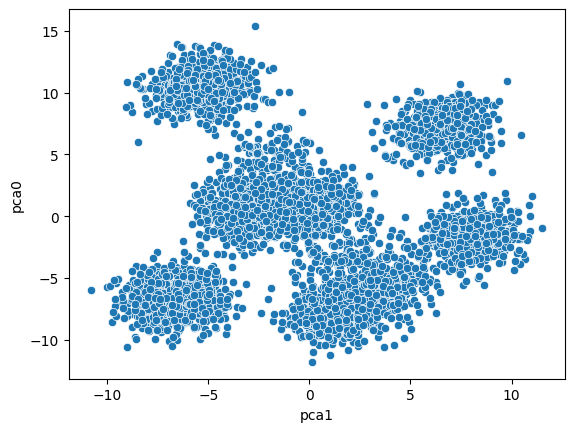

In [28]:
sn.scatterplot(data=pca, y ='pca0' ,x = 'pca1')

In [ ]:
k_means()

from sklearn.neighbors import KNeighborsClassifier